In [25]:
# !pip install -U setuptools pip


In [2]:
# !pip install cupy-cuda12x

In [3]:
! pip install transformers>=4.37.0 pillow optimum[onnxruntime] 

In [3]:
import pandas as pd

df=pd.read_csv('1.csv')

In [4]:
add = lambda num: num + 4    

print(add(6))

10


In [6]:
import cv2

# device = "cuda" if torch.cuda.is_available() else "cpu" 

# ocr = PaddleOCR(lang='en',kw={"use_gpu":False})
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "FSRCNN_x4.pb"
 
sr.readModel(path)
 
sr.setModel("fsrcnn",4)

In [13]:
from io import BytesIO
import cv2
from PIL import Image
from transformers import TrOCRProcessor
from optimum.onnxruntime import ORTModelForVision2Seq
import latex2mathml
processor = TrOCRProcessor.from_pretrained('breezedeus/pix2text-mfr')
model = ORTModelForVision2Seq.from_pretrained('breezedeus/pix2text-mfr', use_cache=False)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
def download_img(url):
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    result = sr.upsample(img)
    cv2.imwrite('res.png',result)
    return Image.open('res.png').convert('RGB')

prohibited_symbols = {'+', '-', '*', '/','±','=','>','<'}
image_fps = [
    '/Users/e410169/Documents/mlext/pix2text2/io/SS1.JPG',
]
images = [download_img(fp) for fp in image_fps]
pixel_values = processor(images=images, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
for i in range(0,len(generated_text)):
    generated_texts = generated_text[i].split('\\\\')
    for text in generated_texts:
                text=text.replace('pm','±')
                if any(symbol in text for symbol in prohibited_symbols):                             
                    text=text.replace('sin','999999999').replace('cos','999999998').replace('tan','9999999997').replace('cosec','9999999996').replace('sec','9999999995').replace('cot','9999999994').replace(' ','').replace('begin{aligned}','').replace('end{aligned}','').replace("{}",'').replace('\\','').replace('&','').replace(',,,','').replace('pm','±').replace('leqslant','≤').replace('leq','≤')
                    text=text.strip()
                    mathml_output = latex2mathml.converter.convert(text)
                    mathml_output=mathml_output.replace('&#x0007C;','|').replace('&#x00021;','').replace('&#x00028;','(').replace('999999999','sin').replace('999999998','cos').replace('9999999997','tan').replace('9999999996','cosec').replace('9999999995','sec').replace('9999999994','cot').replace('&#x0002B;','+').replace('&#x00029;',')').replace('&#x0002F;','/').replace('&#x0002A;','*').replace('&#x0002C;','').replace('stretchy="false"','').replace('<mi>','').replace('</mi>','').replace(' ','').replace('&#x0003E;','>').replace('&#x0003C;','<').replace('&#x0003D;','=').replace('&#x02212;','-').replace('&#x000A0','~').replace('displaystyle','')
                    print(mathml_output)


\begin{aligned} { \frac { f ( a + h ) - f ( a ) } { h } } & { { } = \frac { ( 2 a ^ { 2 } + 4 a h + 2 h ^ { 2 } - 5 a - 5 h + 1 ) - ( 2 a ^ { 2 } - 5 a + 1 ) } { h } } 
<mathxmlns="http://www.w3.org/1998/Math/MathML"display="inline"><mrow><mrow>frac<mrow>f<mo>(</mo>a<mo>+</mo>h<mo>)</mo><mo>-</mo>f<mo>(</mo>a<mo>)</mo></mrow><mrow>h</mrow></mrow><mrow><mo>=</mo>frac<mrow><mo>(</mo><mn>2</mn><msup>a<mrow><mn>2</mn></mrow></msup><mo>+</mo><mn>4</mn>ah<mo>+</mo><mn>2</mn><msup>h<mrow><mn>2</mn></mrow></msup><mo>-</mo><mn>5</mn>a<mo>-</mo><mn>5</mn>h<mo>+</mo><mn>1</mn><mo>)</mo><mo>-</mo><mo>(</mo><mn>2</mn><msup>a<mrow><mn>2</mn></mrow></msup><mo>-</mo><mn>5</mn>a<mo>+</mo><mn>1</mn><mo>)</mo></mrow><mrow>h</mrow></mrow></mrow></math>
 { } & { { } = \frac { 2 a ^ { 2 } + 4 a h + 2 h ^ { 2 } - 5 a - 5 h + 1 - 2 a ^ { 2 } + 5 a - 1 } { h } } 
<mathxmlns="http://www.w3.org/1998/Math/MathML"display="inline"><mrow><mrow><mo>=</mo>frac<mrow><mn>2</mn><msup>a<mrow><mn>2</mn></mrow></msup><mo>+<

In [2]:
import latex2mathml.converter
text='a/b'
mathml_output = latex2mathml.converter.convert(text)
print(mathml_output)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="inline"><mrow><mi>a</mi><mo>&#x0002F;</mo><mi>b</mi></mrow></math>


In [3]:
generated_texts

['\\begin{array} { c } { { \\displaystyle { \\int \\sin ^ { n } u \\, \\cos ^ { m } \\! u \\, d u = - \\frac { \\sin ^ { n - 1 } \\! u \\, \\cos ^ { m + 1 } \\! u } { n + m } + \\frac { n - 1 } { n + m } \\int \\sin ^ { n - 2 } \\! u \\, \\cos ^ { m } \\! u \\, d u } } } ',
 ' { { = \\displaystyle { \\frac { \\sin ^ { n + 1 } \\! u \\, \\cos ^ { m - 1 } \\! u } { n + m } + \\frac { m - 1 } { n + m } \\int \\sin ^ { n } \\! u \\, \\cos ^ { m - 2 } \\! u \\, d u } } } \\end{array}']

In [ ]:
# prohibited_symbols = {'+', '-', '*', '/'}

# # Define the text string to search
# text = "This is a sample text with no mathematical operations."

# # Check if any of the prohibited symbols are present in the text
# if any(symbol in text for symbol in prohibited_symbols):

In [14]:
import latex2mathml.converter
prohibited_symbols = {'+', '-', '*', '/','±','='}
totalGeneratedTextList=[]
for imageWise in totalGeneratedTextList:
    for text in imageWise:
        if any(symbol in text for symbol in prohibited_symbols):
            text=text.replace('$$','').replace('frac','?').replace('sin','999999999').replace('cos','999999998').replace('tan','9999999997').replace('cosec','9999999996').replace('sec','9999999995').replace('cot','9999999994').replace(' ','').replace('cdot',' ').replace('\prime','2').replace('begin{aligned}','').replace('\circ','2').replace('{{}','').replace("{}",'').replace('\\','').replace('&','').replace(',,,','').replace('pm','±').replace('leqslant','≤').replace('leq','≤')
            text=text.strip()
            # text='{{frac}{f(a+h)-f(a)}{h}}={frac}{(2a^{2}+4ah+2h^{2}-5a-5h+1)-(2a^{2}-5a+1)}{h}}'
            mathml_output = latex2mathml.converter.convert(text)
            mathml_output=mathml_output.replace('&#x00021;','').replace('?','frac').replace('&#x00028;','(').replace('999999999','sin').replace('999999998','cos').replace('9999999997','tan').replace('9999999996','cosec').replace('9999999995','sec').replace('9999999994','cot').replace('&#x0002B;','+').replace('&#x00029;',')').replace('&#x0002F;','/').replace('&#x0002A;','*').replace('&#x0002C;','').replace('stretchy="false"','').replace(' ','').replace('&#x0003E;','>').replace('&#x0003C;','<').replace('&#x0003D;','=').replace('&#x02212;','-').replace('&#x000A0','~').replace('displaystyle','')

In [19]:
# for out in generated_texts:
#   text = out['text']
#   if pattern.search(text):
#     annotations.append(out)
#   text=text.strip()
#   text=text.replace('$$','').replace('\prime','2').replace('\circ','2').replace('{{}','').replace('{}','').replace('\\','').replace('{}','').replace('&','').replace(', , ,','').replace('pm','±').replace('leqslant','≤').replace('leq','≤')
#   print(text)

## Method 2: Using Pix2Text

This method requires the installation of pix2text, utilizing the Mathematical Formula Detection model (MFD) within Pix2Text. It is capable of recognizing not only pure formula images but also mixed images containing text.



In [6]:
# !pip install pix2text>=1.0

### Recognize Images with English/Simplfied Chinese Texts

2024-03-05 15:38:30.182047 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 8 number of nodes in the graph: 232 number of nodes supported by CoreML: 216


100%|██████████| 1/1 [00:29<00:00, 29.46s/it]



$$
$$



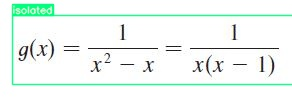

In [48]:
#! pip install pix2text>=1.0
import requests
from pix2text import Pix2Text, merge_line_texts

def download_img(url):
    # response = requests.get(url)
    # image_file = BytesIO(response.content)
    return Image.open(url).convert('RGB')

# image_fps = [
#     'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/formula.jpg',
#     # 'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/math-formula-42.png',
# ]
# images = [download_img(img_fp) for img_fp in image_fps]

p2t = Pix2Text()
# outs = p2t.recognize_formula(images)  # recognize pure formula images
# print('outs for pure formula images', outs)

mixed_img_fp = '/Users/e410169/Documents/mlext/pix2text2/io/SS2.JPG'
mixed_img = download_img(mixed_img_fp)

outs2 = p2t.recognize(mixed_img, save_analysis_res='en1-out.jpg')  # recognize mixed images
print(merge_line_texts(outs2))
from IPython.display import display
display(Image.open('en1-out.jpg'))

### Recognize Images with Other-language Texts

In [11]:
! pip install pix2text[multilingual]>=1.0

100%|██████████| 3/3 [00:10<00:00,  3.34s/it]


RÚT GỌN BIỂU THỨC ĐẠI SỐ VÀ CÁC BÀI TOÁN LIÊN QUAN ALÝ IHUYÉT
1 Kiến thức 6, Z,8 quan trong cần nhớ
a. Tính chất về phân số ( phân thức): $\frac{A. M} {B. M}=\frac{A} {B}$  $( M \neq0, B \neq0 )$ 
b. Những hằng dẳng thức đáng nhớ
$$
\begin{array} {r l} {\bullet} & {{} ( A+B )^{2}=A^{2}+2 A B+B^{2}} \\ {\bullet} & {{} ( A-B )^{2}=A^{2} \cdot2 A B+B^{2}} \end{array}
$$



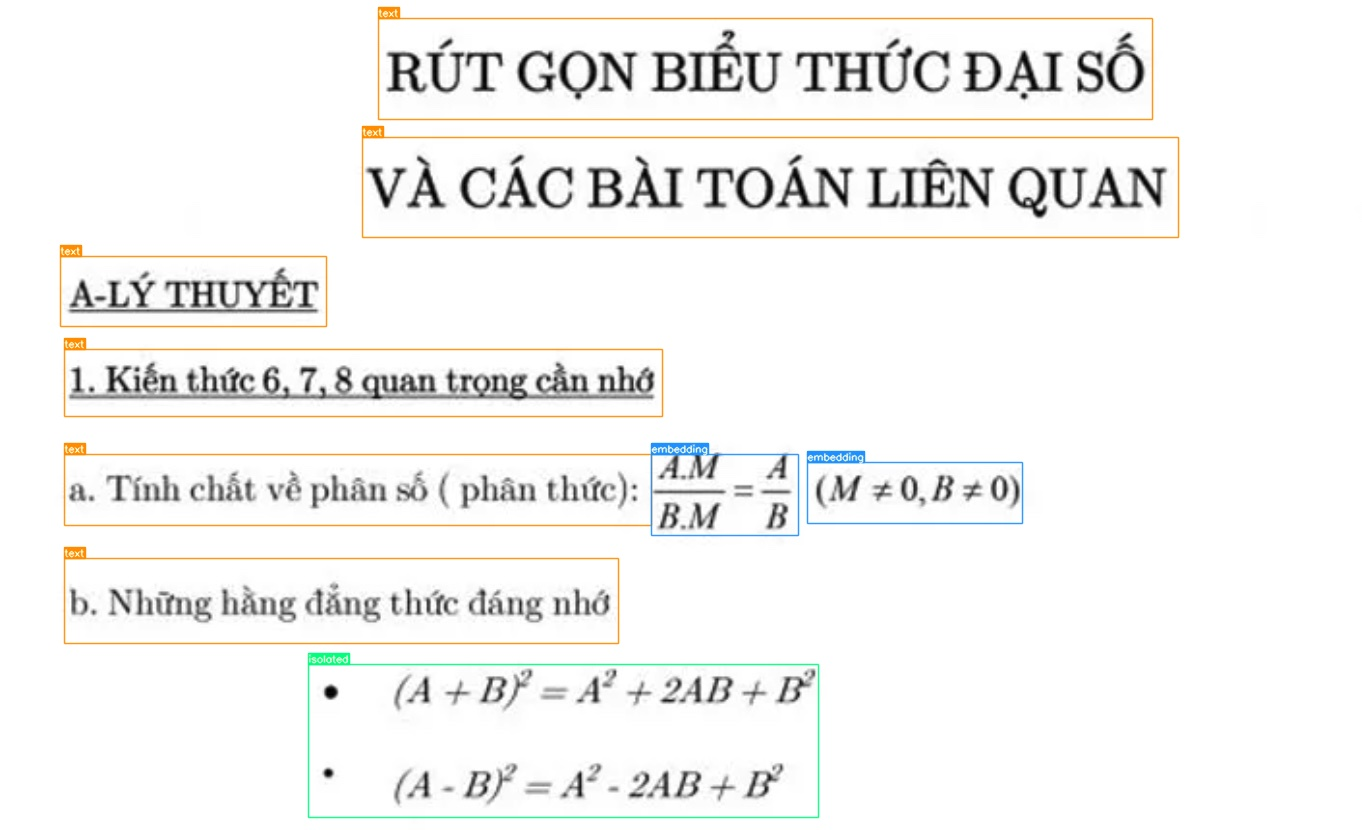

In [13]:
#! pip install pix2text[multilingual]>=1.0

from pix2text import Pix2Text, merge_line_texts

def download_img(url):
    response = requests.get(url)
    image_file = BytesIO(response.content)
    return Image.open(image_file).convert('RGB')

p2t = Pix2Text(languages=('en', 'vi'))  # supported language list: https://github.com/breezedeus/Pix2Text?tab=readme-ov-file#list-of-supported-languages

mixed_img_fp = 'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/vietnamese.jpg'
mixed_img = download_img(mixed_img_fp)

outs2 = p2t.recognize(mixed_img, save_analysis_res='vietnamese-out.jpg')  # recognize mixed images
print(merge_line_texts(outs2))
from IPython.display import display
display(Image.open('vietnamese-out.jpg'))

In [2]:
pip install RealESRGAN

In [1]:
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

path_to_image = 'v.png'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)

sr_image.save('results/sr_image.png')

^C
ERROR: Operation cancelled by user


In [ ]:
# from pysentimiento import create_analyzer
# analyzer = create_analyzer(task="sentiment", lang="en")

# analyzer.predict("Qué gran jugador es Messi")